In [20]:
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv('/content/placement.csv')

In [22]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [24]:
df.shape

(100, 4)

In [25]:
df = df.iloc[:,1:]

In [26]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [27]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [28]:
import matplotlib.pyplot as plt


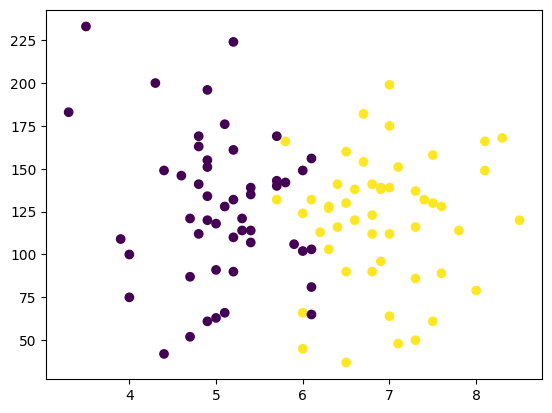

In [29]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [30]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [31]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [32]:
y.shape

(100,)

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [34]:
X_train

,cgpa,iq
59,4.8,112.0
9,5.1,66.0
75,4.8,169.0
95,4.3,200.0
27,6.0,124.0
...,...,...
58,8.0,79.0
15,5.1,176.0
65,8.1,166.0
2,5.3,121.0


In [35]:
y_train

,placement
59,0
9,0
75,0
95,0
27,1
...,...
58,1
15,0
65,1
2,0


In [36]:
X_test

,cgpa,iq
94,4.7,52.0
50,3.5,233.0
12,5.4,139.0
99,6.2,113.0
83,7.5,130.0
70,6.3,127.0
37,8.1,149.0
63,6.3,128.0
5,7.1,48.0
87,5.7,132.0


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [40]:
X_train

array([[-1.05418124, -0.29572236],
       [-0.78642119, -1.48782614],
       [-1.05418124,  1.18144971],
       [-1.50044799,  1.984824  ],
       [ 0.01685897,  0.01526123],
       [ 1.35565922,  0.89638142],
       [-1.05418124,  0.45582133],
       [-1.85746139, -0.37346826],
       [ 0.01685897,  0.66314372],
       [-0.69716784, -0.86585895],
       [-2.39298149,  1.54426391],
       [ 0.37387237,  0.45582133],
       [-0.96492789, -1.61740264],
       [-1.76820804, -1.25458845],
       [ 0.82013912, -0.71036716],
       [ 1.17715252, -1.90247094],
       [ 2.24819272, -0.08839997],
       [ 0.10611232,  0.22258363],
       [ 0.64163242,  1.51834861],
       [ 0.90939247, -0.29572236],
       [ 1.62341927, -0.24389176],
       [ 0.37387237, -0.19206116],
       [ 0.90939247,  0.40399073],
       [ 0.73088577, -0.01065407],
       [-1.41119464,  0.66314372],
       [-0.69716784,  0.97412732],
       [ 0.46312572, -2.23936983],
       [ 0.73088577,  0.45582133],
       [ 1.44491257,

In [41]:
X_test = scaler.transform(X_test)

In [42]:
X_test

array([[-1.14343459, -1.85064034],
       [-2.21447479,  2.84002889],
       [-0.51866114,  0.40399073],
       [ 0.19536567, -0.26980706],
       [ 1.35565922,  0.17075303],
       [ 0.28461902,  0.09300713],
       [ 1.89117932,  0.66314372],
       [ 0.28461902,  0.11892243],
       [ 0.99864582, -1.95430154],
       [-0.25090108,  0.22258363]])

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf = LogisticRegression()

In [45]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred = clf.predict(X_test)

In [47]:
y_test

,placement
94,0
50,0
12,0
99,1
83,1
70,1
37,1
63,1
5,1
87,1


In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.9

In [50]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

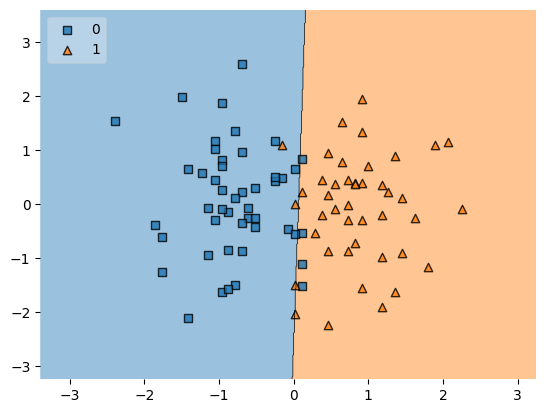

In [60]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [52]:
import pickle

In [53]:
pickle.dump(clf,open('model.pkl','wb'))